In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [56]:
salaries = pd.read_csv('core/Salaries.csv')
battingTotals = pd.read_csv('core/Batting.csv')
players = pd.read_csv('core/People.csv')
pitching = pd.read_csv('core/Pitching.csv')

## data for salaries begins in 1985, so cut off everything in batting totals before then for batting


battingTotals = battingTotals[battingTotals.yearID >= 1985]
display(battingTotals)

#display(battingTotals[battingTotals.playerID == 'zupofr01'])
display(salaries[salaries.playerID == 'zumayjo01'])

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62253,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62254,abregjo01,1985,1,CHN,NL,6,9,0,0,0,...,1.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
62255,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62256,adamsri02,1985,1,SFN,NL,54,121,12,23,3,...,10.0,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0
62257,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104319,zimmejo02,2017,1,DET,AL,29,6,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
104320,zimmery01,2017,1,WAS,NL,144,524,90,159,33,...,108.0,1.0,0.0,44,126.0,1.0,3.0,0.0,5.0,16.0
104321,zobribe01,2017,1,CHN,NL,128,435,58,101,20,...,50.0,2.0,2.0,54,71.0,2.0,2.0,2.0,3.0,13.0
104322,zuninmi01,2017,1,SEA,AL,124,387,52,97,25,...,64.0,1.0,0.0,39,160.0,0.0,8.0,0.0,1.0,8.0


,yearID,teamID,lgID,playerID,salary
17570,2006,DET,AL,zumayjo01,327000
18391,2007,DET,AL,zumayjo01,410000
19236,2008,DET,AL,zumayjo01,420000
20076,2009,DET,AL,zumayjo01,735000
20895,2010,DET,AL,zumayjo01,915000
21723,2011,DET,AL,zumayjo01,1400000


<Axes: xlabel='H', ylabel='salary'>

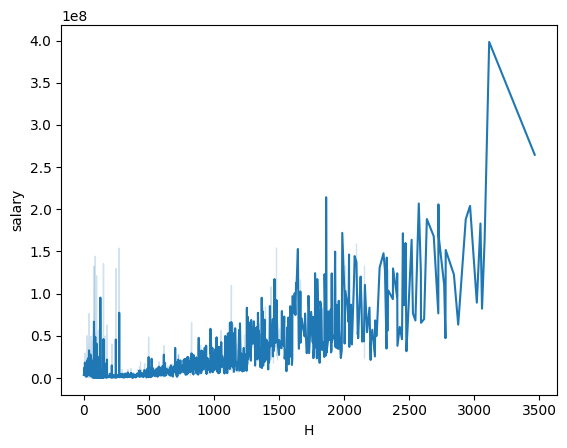

In [57]:
salariesPerPlayer = salaries.groupby('playerID').agg({'salary':'sum'}).reset_index()

battingPerYear = battingTotals[['playerID', 'H', 'yearID']]

battingPerPlayer = battingPerYear.groupby('playerID').agg({'H':'sum'}).reset_index()

salariesAndHits = pd.merge(battingPerPlayer, salariesPerPlayer, on='playerID')

#display(salariesAndHits)


sns.lineplot(x='H', y='salary', data=salariesAndHits)


#sns.scatterplot(x='playerID', y='salary', data=totalPlayerSalaries)

,playerID,SO,W,GS,salary
346,burneaj01,2513,164,430,144271500
487,clemero02,4546,345,687,121001000
514,coneda01,2668,194,419,66947501
791,finlech01,2610,200,467,65504063
913,glavito02,2607,305,682,129639293
1268,johnsra05,4875,303,603,175550019
1513,maddugr01,3371,355,740,153845000
1563,martipe02,3154,219,409,146259585
1770,mussimi01,2813,270,536,144533619
2246,sabatcc01,2846,237,509,218642856


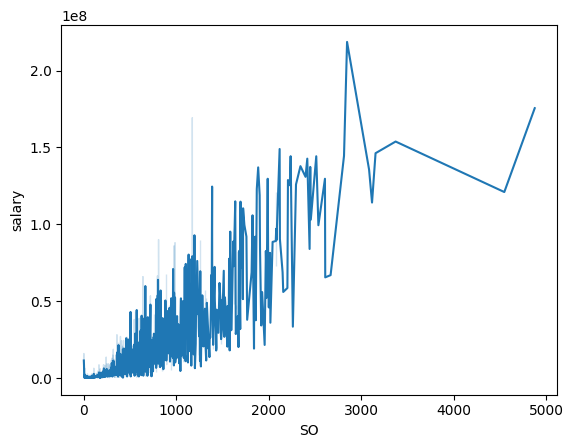

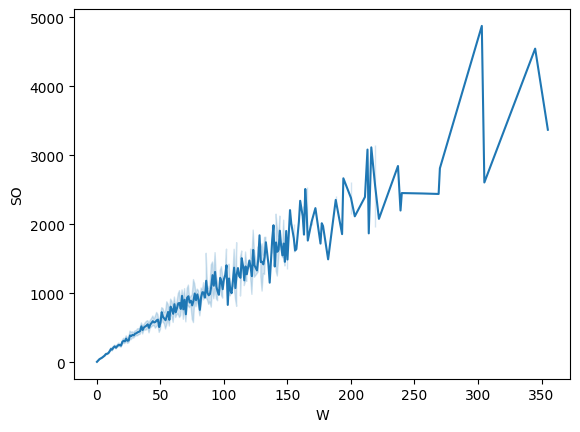

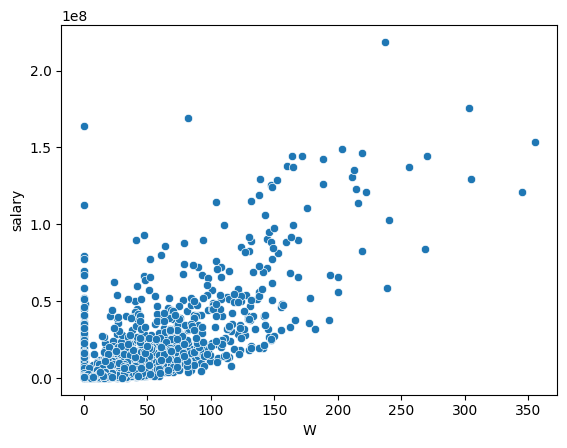

In [58]:
pitching = pitching[pitching.yearID >= 1985]

pitchingPerPlayer = pitching.groupby('playerID').agg({'SO' : 'sum', 'W':'sum', 'GS':'sum'}).reset_index()

salariesAndPitches = pd.merge(pitchingPerPlayer, salariesPerPlayer, on='playerID')

sns.lineplot(x='SO', y='salary', data=salariesAndPitches)
plt.figure()
sns.lineplot(x='W', y='SO', data=salariesAndPitches)
plt.figure()
sns.scatterplot(x='W', y='salary', data=salariesAndPitches)

display(salariesAndPitches[salariesAndPitches.SO >= 2500])
